In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[]

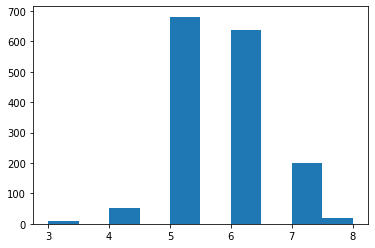

In [4]:
plt.hist(df['quality'])
plt.plot()

In [5]:
# create class labels (0=paintStripper, 1=midShelf)
df['class'] = df['quality'].apply(lambda x: 'paintStripper' if x<=5 else 'midShelf')
df['class_binary'] = df['quality'].apply(lambda x: 0 if x<=5 else 1)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,class_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,paintStripper,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,paintStripper,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,paintStripper,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,midShelf,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,paintStripper,0


In [7]:
# pretty good distribution of classes so let's crack on
df['class'].value_counts()

midShelf         855
paintStripper    744
Name: class, dtype: int64

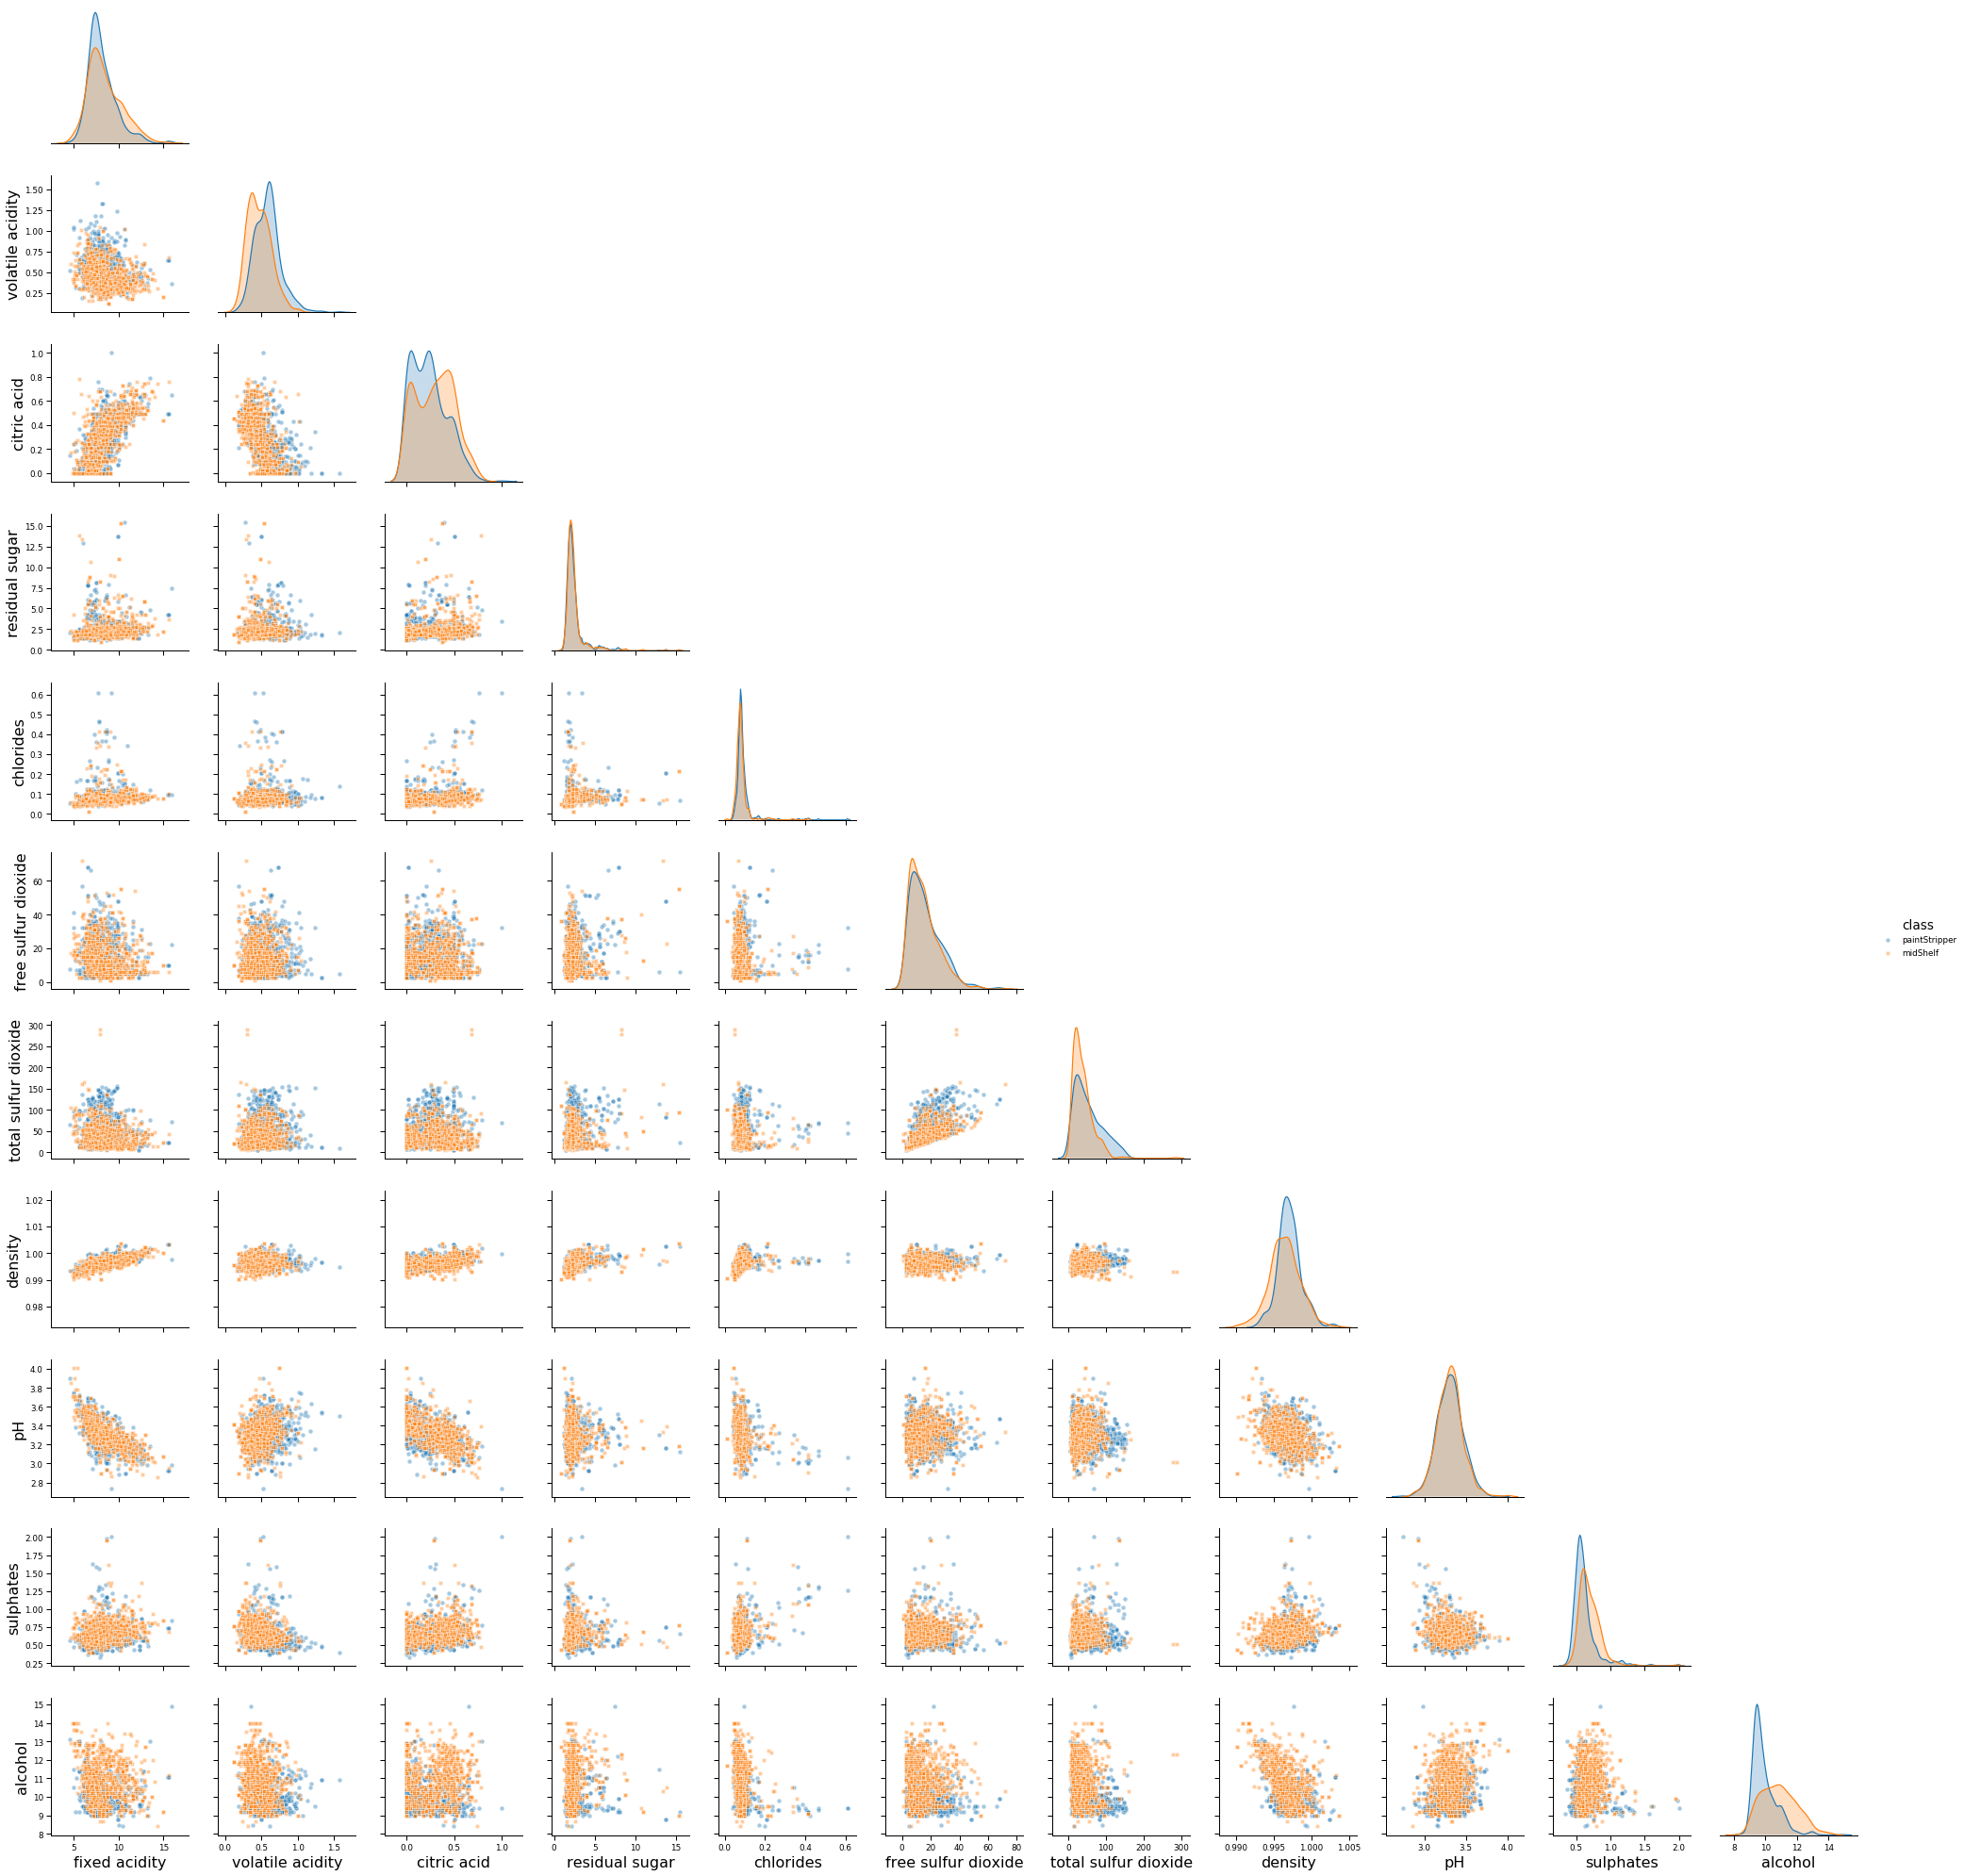

In [30]:
# as a general rule, for any algorithm that uses gradient descent, we should scale the features, 
# but let's take a gander at them first
sns.set_context("paper", rc={"axes.labelsize":16})
sns.pairplot(df.drop(['quality', 'class_binary'], axis=1), kind='scatter', hue='class', markers=["o", "s"], corner=True,
            plot_kws={'alpha':0.4})
plt.show()

In [ ]:
# generally, distributions are normalish, so we'll just apply standardization then crack on with some modelling

# split data into features and class labels
y = df['class_binary']
X = df.drop(['quality', 'class', 'class_binary'], axis=1)

# scale features: z = (x - u)/s, where x is a sample (data point), u and s are the mean and std of that feature, respectively 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std.head()

In [ ]:
# check all features are now similar orders of magnitude with means ~0
X_std.describe()

In [ ]:
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)
print(f'Training examples (m): {X_train.shape[0]};  test examples: {X_test.shape[0]}')

In [ ]:
# Data scaled and in right format. Now, as this exercise is about understanding more intuitively how logistic regression works under the hood,
# we're going to stop working with pandas and scikit learn and instead move into arrays. Then you're going to start building your own functions
# to implement logistic regression